In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [2]:
# Importing required libraries

import numpy as np
import scipy.stats as ss
import scipy.linalg as lin
from numpy.random import default_rng
import matplotlib.pyplot as plt 
import math
import pickle as pk

In [3]:
# C.1.

def GetData(m,c,points):
  
  D1 , D2 = np.random.multivariate_normal(mean = m, cov = c , size = points).T
  W = np.vstack((D1,D2)) 
  return W 

m1 = [-1, -1]
c1 = [[2, 0.5], [0.5, 1]]

m2 = [1, 1]
c2 = [[2, 0.5], [0.5, 1]]

points = 100

# X1 = GetData(m1,c1,points)
# X2 = GetData(m2,c2,points)


In [4]:
path = '/content/drive/MyDrive/Projects/SML_Assignment/Assignment_2/Saved_Data/'
# pk.dump(X1, open(path+'Q3X1.pkl', "wb"))
# pk.dump(X2, open(path+'Q3X2.pkl', "wb"))

X1 = pk.load(open(path+'Q3X1.pkl', "rb"))
X2 = pk.load(open(path+'Q3X2.pkl', "rb"))

Z = np.hstack((X1,X2))
print('Shape of X1: ',X1.shape)
print('Shape of X2: ',X2.shape)
print('Shape after merrging Z: ',Z.shape)

Shape of X1:  (2, 100)
Shape of X2:  (2, 100)
Shape after merrging Z:  (2, 200)


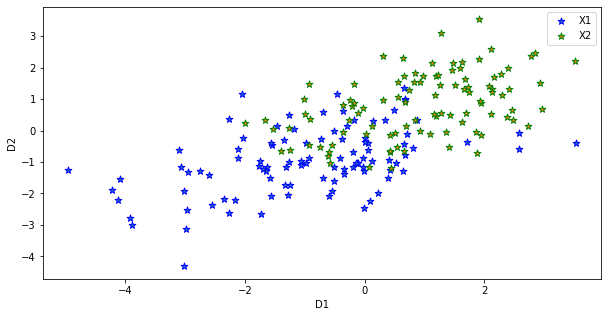

In [5]:
# C.2.

def Plot(Data1,Data2): 
  plt.figure(figsize=(10,5))
  plt.scatter(Data1[0,:], Data1[1,:], label='X1' , marker ="*",  edgecolor ="blue",  s = 50) 
  plt.scatter(Data2[0,:], Data2[1,:], label='X2' , marker ="*",  edgecolor ="green",  s = 50)  
  plt.xlabel('D1')
  plt.ylabel('D2')
  plt.legend()
  plt.show() 

Plot(X1,X2)



In [6]:
# C.3.

def Mean_Covariance(Z):
  mu = np.mean(Z,axis=1).T
  X = (Z.T - mu).T
  S = (1/Z.shape[1])*np.dot(X,X.T)
  return mu,S,X

mu , S , X = Mean_Covariance(Z)
print('Mean : ',mu)
print('\nCovariance : ')
print(S)
print('\nFew Samples from Centralised Data X : ')
print(X[:,:5])


Mean :  [-0.01773536 -0.0730942 ]

Covariance : 
[[2.69902743 1.45218749]
 [1.45218749 1.82260252]]

Few Samples from Centralised Data X : 
[[ 0.00863869  0.69364801 -3.05031854 -1.70761419 -2.95314205]
 [-2.3856468   1.08386401 -1.09224055 -2.57502135 -2.46122363]]


In [7]:
# C.4.

def Arranged_Vectors(Mat):
  values , U = lin.eig(Mat)
  return abs(values),U

Eig , U = Arranged_Vectors(S)
print('Eigen Values in non increasing order : ')
print(Eig)
print('\n Corresponding eigen vectors (U): ')
print(U)  

Eigen Values in non increasing order : 
[3.77767972 0.74395022]

 Corresponding eigen vectors (U): 
[[ 0.80277443 -0.59628284]
 [ 0.59628284  0.80277443]]


In [8]:
# C.5.

Y = np.dot(U.T[:,0],X)
print('Shape of Y after projection along first column of U : ',Y.shape)
print('\nProjected Y(Till 100 points) : ')
print(Y[:100])

Shape of Y after projection along first column of U :  (200,)

Projected Y(Till 100 points) : 
[ 1.42945516 -0.08944662 -1.79743342  0.16461203 -0.90312151  0.15194924
  2.08763239  0.72576953 -3.26386223 -2.36539121 -0.64712191  0.48489109
 -0.57971212  0.25519208 -0.99904374 -0.85062907 -1.5133854  -0.45657833
  0.1668508   1.37408681 -0.95177937 -0.55108647 -1.28786807 -0.164144
  1.00906552  0.64756611 -0.40326445  0.46074842 -1.47702667 -2.38814508
 -0.38917688 -1.19375465 -0.46334208  0.12671893 -0.76652742  0.8599991
 -0.06849557  1.05676245 -1.08919024 -0.5750095   0.94497151 -0.69019268
  0.60351027 -0.07850167 -0.3691244  -1.26580849  1.17542843  0.00834248
  0.29886341  0.38533254 -0.6684806  -0.19409005 -0.61436326 -0.238697
 -1.35584687  0.48892708  1.56201973 -1.04527551 -0.36210446  0.75880753
  0.52151095 -0.453245   -1.2999951  -1.51315498 -0.43353083  0.49540493
  0.64054641 -0.10442317  0.25411355 -2.07666145 -0.30267191  0.10102162
  0.46880182  0.42247544 -0.310381

(100,)
(100,)


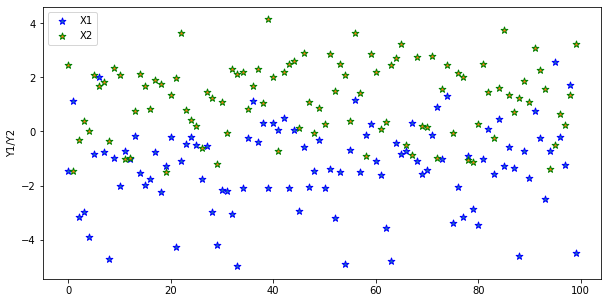

In [9]:
# C.6.


Y1 = np.dot(U[:,0].T,X1).T
print(Y1.shape)

Y2 = np.dot(U[:,0].T,X2).T
print(Y2.shape)

plt.figure(figsize=(10,5))
plt.scatter([i for i in range(100)], Y1, label='X1' , marker ="*",  edgecolor ="blue",  s = 50) 
plt.scatter([i for i in range(100)], Y2, label='X2' , marker ="*",  edgecolor ="green",  s = 50)  
plt.xlabel('')
plt.ylabel('Y1/Y2')
plt.legend()
plt.show()

In [10]:
# C.7.

def GetMSE(X,Y):
  MSE = Z_recons-Z
  MSE = np.square(MSE)
  MSE = np.mean(np.mean(MSE))
  return MSE

X1_recons = np.dot(np.reshape(U[:,0],(len(U[:,0]),1)),np.reshape(Y1,(1,len(Y1))))
X2_recons = np.dot(np.reshape(U[:,0],(len(U[:,0]),1)),np.reshape(Y2,(1,len(Y2))))
X_recons = np.hstack((X1_recons,X2_recons))
Z_recons = X_recons + np.reshape(mu,(len(mu),1))
print('MSE between Z and Z_reconsructed : ',GetMSE(Z,Z_recons))

MSE between Z and Z_reconsructed :  0.3736468218215787
